In [1]:
import numpy as np

from sktime.datasets import load_NAB_dataset

X = load_NAB_dataset("realTraffic/speed_7578")
X.index = range(len(X))
X

0       73
1       62
2       66
3       69
4       65
        ..
1122    33
1123    23
1124    26
1125    19
1126    27
Name: value, Length: 1127, dtype: int64

In [2]:
import matplotlib.pyplot as plt


def plot_anomaly(X, y_preds):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    color = "tab:blue"
    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel("Value", color=color)
    ax1.plot(X, color=color, label="Value")
    ax1.tick_params(axis="y", labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = "tab:red"
    ax2.set_ylabel("Anomaly Score", color=color)
    ax2.plot(np.array(y_preds), color=color, label="Anomaly Score")
    ax2.tick_params(axis="y", labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title("Values and Anomaly Scores Over Time")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## Online Bayes CPD for Anomaly Detection

In [9]:
from sktime.annotation.online_anomaly.online_bayes_cpd import (
    OnlineBayesCPD,
    StudentTDistribution,
)

student_t = StudentTDistribution()

online_bayes_ad = OnlineBayesCPD(student_t)

online_bayes_ad.fit(X)
y_preds = online_bayes_ad.predict(X=X)
y_preds

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1122    0.000000
1123    0.944099
1124    0.000000
1125    0.600000
1126    0.000000
Length: 1127, dtype: float64

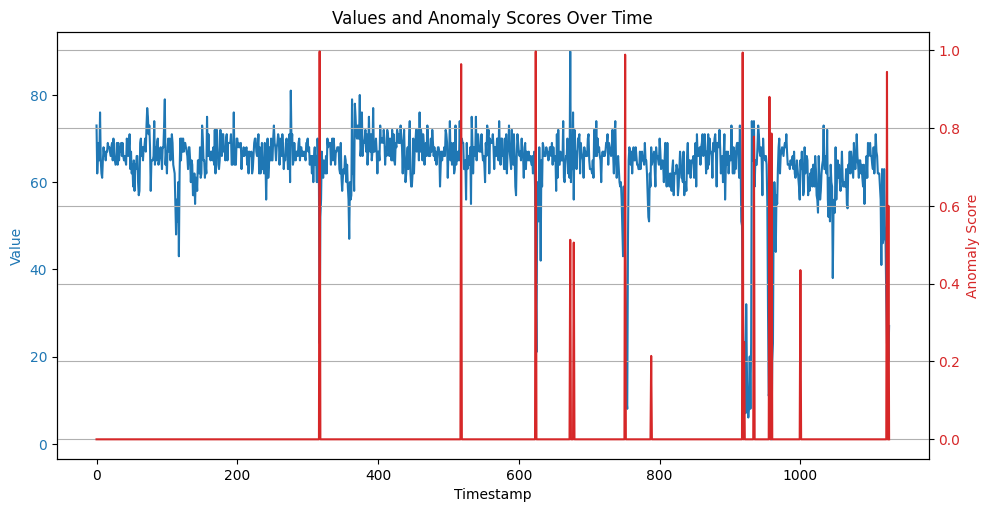

In [10]:
plot_anomaly(X, y_preds)

### Test update workflow

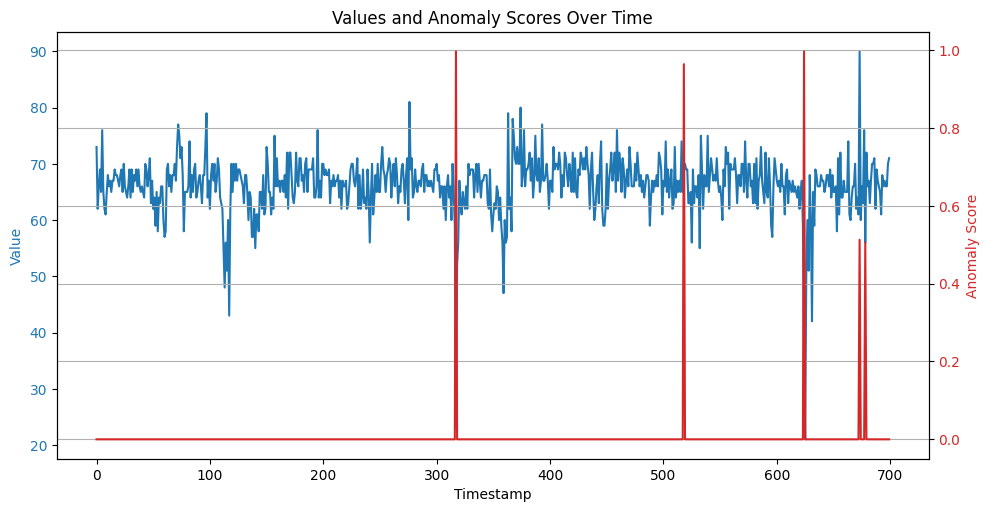

In [13]:
online_bayes_ad_t = OnlineBayesCPD(student_t)
X1 = X[:700]
X2 = X[700:]

online_bayes_ad_t.fit(X[:5000])
y_preds_1 = online_bayes_ad_t.predict(X=X1)
plot_anomaly(X1, y_preds_1)

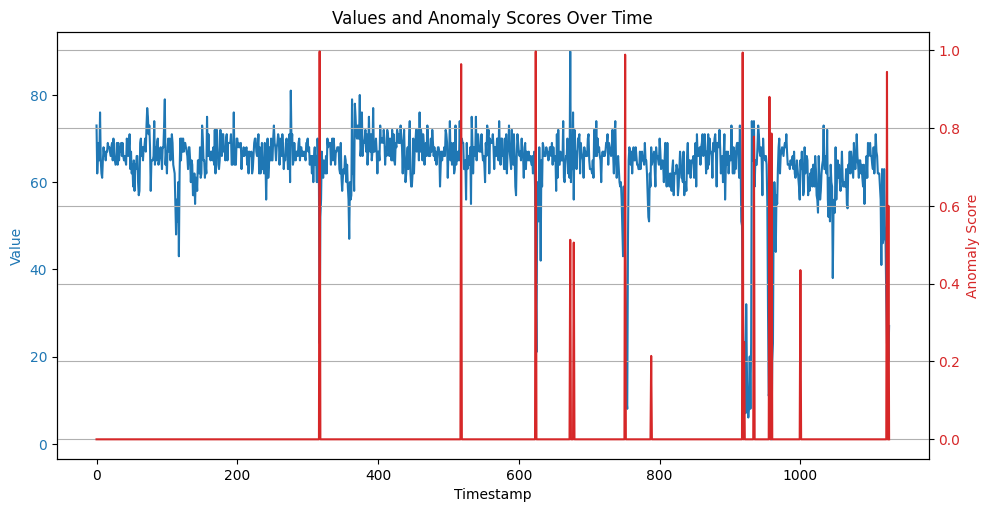

In [14]:
online_bayes_ad_t.fit(X[:500])
y_preds_2 = online_bayes_ad_t.update_predict(X=X2)
plot_anomaly(X, y_preds_2)